In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
bc = datasets.load_breast_cancer()

In [3]:
X,y = bc.data, bc.target

In [4]:
n_samples, n_features = X.shape

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, test_size=0.2)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [8]:
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

In [9]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.ln = nn.Linear(n_input_features, 1)
        
    def forward(self,x):
        return torch.sigmoid(self.ln(x))

In [10]:
model = LogisticRegression(n_features)

In [11]:
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
n_epochs = 200
for epoch in range(n_epochs):
    y_pred = model(X_train)
    l = loss(y_pred, y_train)
    
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1)%10==0:
        print(f'epoch:{epoch+1}- loss:{l.item():.3f}')

epoch:10- loss:0.612
epoch:20- loss:0.502
epoch:30- loss:0.434
epoch:40- loss:0.387
epoch:50- loss:0.353
epoch:60- loss:0.326
epoch:70- loss:0.306
epoch:80- loss:0.288
epoch:90- loss:0.274
epoch:100- loss:0.262
epoch:110- loss:0.252
epoch:120- loss:0.242
epoch:130- loss:0.234
epoch:140- loss:0.227
epoch:150- loss:0.220
epoch:160- loss:0.215
epoch:170- loss:0.209
epoch:180- loss:0.204
epoch:190- loss:0.200
epoch:200- loss:0.196


In [13]:
with torch.no_grad():
    y_prediction = model(X_test)
    y_predicted = y_prediction.round()
    
    acc = y_predicted.eq(y_test).sum()/float(y_test.shape[0])
    
    print(acc)

tensor(0.9912)


In [14]:
import matplotlib.pyplot as plt

TypeError: the first argument to axis() must be an interable of the form [xmin, xmax, ymin, ymax]

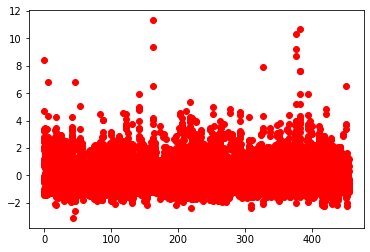

In [23]:
plt.plot(X_train, 'ro')
plt.axis(y)
plt.show()